In [1]:
# This package is for doing symbolic math in python
from sympy import *

### Create symbolic variables
Using unicode symbols for math is quite nice

In [2]:
θ, α, θ̇, α̇, θ̈, α̈ = symbols('θ α θ̇ α̇  θ̈ α̈')
rm, kt, km, mr, Lr, Jr, Dr, mp, Lp, Jp, Dp, g, tau = symbols('rm kt km mr Lr Jr Dr mp Lp Jp Dp g τ')

In [3]:
init_printing(use_unicode=True) # Allows for latex-like equations

In [4]:
# Make sure symbols match what they are supposed to match
print('θ={}, α={}, θ̇={}, α̇={}, θ̈={}, α̈={}'.format(θ, α, θ̇, α̇, θ̈, α̈))
print('rm={}, kt={}, km={}, mr={}, Lr={}, Jr={}, Dr={}, mp={}, Lp={}, Jp={}, Dp={}, g={}, tau={}'.format(rm, kt, km, mr, Lr, Jr, Dr, mp, Lp, Jp, Dp, g, tau))

θ=θ, α=α, θ̇=θ̇, α̇=α̇, θ̈=θ̈, α̈=α̈
rm=rm, kt=kt, km=km, mr=mr, Lr=Lr, Jr=Jr, Dr=Dr, mp=mp, Lp=Lp, Jp=Jp, Dp=Dp, g=g, tau=τ


### Create equations matching the workbook

##### Equation 2.2

In [5]:
# left hand side of equation (2.2)
coeff_θ̈  = (mp * Lr**2) + (1/4)*(mp * Lp**2) - (1/4)*(mp * Lp**2 * (cos(α)**2)) + Jr
coeff_α̈  = -(1/2)*(mp * Lp * Lr * cos(α))
coeff_θ̇α̇ = (1/2)*(mp * Lp**2 * sin(α) * cos(α))
coeff_α̇α̇ = (1/2)*(mp * Lp * Lr * sin(α))  # α̇α̇ == α̇^2
lhs_22 = (coeff_θ̈ * θ̈) + (coeff_α̈ * α̈) + (coeff_θ̇α̇ * θ̇ * α̇) + (coeff_α̇α̇ * α̇ * α̇)

# right hand side
rhs_22 = tau - Dr * θ̇

# equation fully written out
equation_22 = Eq(lhs_22, rhs_22)

In [6]:
equation_22

##### Equation 2.3

In [7]:
# left hand side of equation (2.3)
coeff_θ̈  = (-1/2)*(mp * Lp * Lr * cos(α))
coeff_α̈  = Jp + (1/4)*(mp * Lp**2)
coeff_θ̇θ̇ = (-1/4)*(mp * Lp**2 * cos(α) * sin(α))
lhs_23 = (coeff_θ̈ * θ̈) + (coeff_α̈ * α̈) + (coeff_θ̇θ̇ * θ̇ * θ̇) + ((-1/2)*(mp * Lp * g * sin(α)))

# right hand side
rhs_23 = - Dp * α̇

# equation fully written out
equation_23 = Eq(lhs_23, rhs_23)

In [8]:
equation_23

### Solve the system of equations for α_acceleration and θ_acceleration

In [9]:
solved_eqs = solve([equation_22, equation_23], [θ̈, α̈])

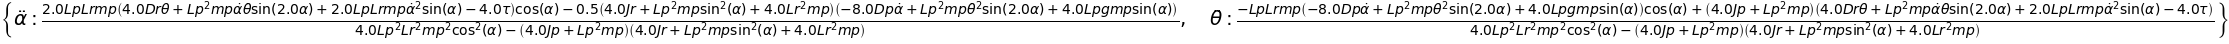

In [10]:
solved_eqs

In [11]:
print(solved_eqs)

{θ̈: (-Lp*Lr*mp*(-8.0*Dp*α̇ + Lp**2*mp*θ̇**2*sin(2.0*α) + 4.0*Lp*g*mp*sin(α))*cos(α) + (4.0*Jp + Lp**2*mp)*(4.0*Dr*θ̇ + Lp**2*mp*α̇*θ̇*sin(2.0*α) + 2.0*Lp*Lr*mp*α̇**2*sin(α) - 4.0*τ))/(4.0*Lp**2*Lr**2*mp**2*cos(α)**2 - (4.0*Jp + Lp**2*mp)*(4.0*Jr + Lp**2*mp*sin(α)**2 + 4.0*Lr**2*mp)), α̈: (2.0*Lp*Lr*mp*(4.0*Dr*θ̇ + Lp**2*mp*α̇*θ̇*sin(2.0*α) + 2.0*Lp*Lr*mp*α̇**2*sin(α) - 4.0*τ)*cos(α) - 0.5*(4.0*Jr + Lp**2*mp*sin(α)**2 + 4.0*Lr**2*mp)*(-8.0*Dp*α̇ + Lp**2*mp*θ̇**2*sin(2.0*α) + 4.0*Lp*g*mp*sin(α)))/(4.0*Lp**2*Lr**2*mp**2*cos(α)**2 - (4.0*Jp + Lp**2*mp)*(4.0*Jr + Lp**2*mp*sin(α)**2 + 4.0*Lr**2*mp))}


In [12]:
# Make everything easy to copy into python code

# print_theta_dot_dot = solved_eqs['θ′′'] # This doesn't work for some reason...
print_theta_dot_dot = str(solved_eqs[list(solved_eqs.keys())[0]]) # But this works
print_theta_dot_dot = print_theta_dot_dot.replace('α̈', 'alpha_dot_dot')
print_theta_dot_dot = print_theta_dot_dot.replace('θ̈', 'theta_dot_dot')
print_theta_dot_dot = print_theta_dot_dot.replace('α̇', 'alpha_dot')
print_theta_dot_dot = print_theta_dot_dot.replace('θ̇', 'theta_dot')
print_theta_dot_dot = print_theta_dot_dot.replace('α', 'alpha')
print_theta_dot_dot = print_theta_dot_dot.replace('θ', 'theta')
print_theta_dot_dot = print_theta_dot_dot.replace('τ', 'tau')
print_theta_dot_dot = print_theta_dot_dot.replace('sin', 'np.sin')
print_theta_dot_dot = print_theta_dot_dot.replace('cos', 'np.cos')

# print_alpha_dot_dot = solved_eqs['α′′'] # This doesn't work for some reason...
print_alpha_dot_dot = str(solved_eqs[list(solved_eqs.keys())[1]]) # But this works
print_alpha_dot_dot = print_alpha_dot_dot.replace('α̈', 'alpha_dot_dot')
print_alpha_dot_dot = print_alpha_dot_dot.replace('θ̈', 'theta_dot_dot')
print_alpha_dot_dot = print_alpha_dot_dot.replace('α̇', 'alpha_dot')
print_alpha_dot_dot = print_alpha_dot_dot.replace('θ̇', 'theta_dot')
print_alpha_dot_dot = print_alpha_dot_dot.replace('α', 'alpha')
print_alpha_dot_dot = print_alpha_dot_dot.replace('θ', 'theta')
print_alpha_dot_dot = print_alpha_dot_dot.replace('τ', 'tau')
print_alpha_dot_dot = print_alpha_dot_dot.replace('sin', 'np.sin')
print_alpha_dot_dot = print_alpha_dot_dot.replace('cos', 'np.cos')

print('theta_dot_dot =', print_theta_dot_dot)
print('alpha_dot_dot =', print_alpha_dot_dot)

theta_dot_dot = (-Lp*Lr*mp*(-8.0*Dp*alpha_dot + Lp**2*mp*theta_dot**2*np.sin(2.0*alpha) + 4.0*Lp*g*mp*np.sin(alpha))*np.cos(alpha) + (4.0*Jp + Lp**2*mp)*(4.0*Dr*theta_dot + Lp**2*mp*alpha_dot*theta_dot*np.sin(2.0*alpha) + 2.0*Lp*Lr*mp*alpha_dot**2*np.sin(alpha) - 4.0*tau))/(4.0*Lp**2*Lr**2*mp**2*np.cos(alpha)**2 - (4.0*Jp + Lp**2*mp)*(4.0*Jr + Lp**2*mp*np.sin(alpha)**2 + 4.0*Lr**2*mp))
alpha_dot_dot = (2.0*Lp*Lr*mp*(4.0*Dr*theta_dot + Lp**2*mp*alpha_dot*theta_dot*np.sin(2.0*alpha) + 2.0*Lp*Lr*mp*alpha_dot**2*np.sin(alpha) - 4.0*tau)*np.cos(alpha) - 0.5*(4.0*Jr + Lp**2*mp*np.sin(alpha)**2 + 4.0*Lr**2*mp)*(-8.0*Dp*alpha_dot + Lp**2*mp*theta_dot**2*np.sin(2.0*alpha) + 4.0*Lp*g*mp*np.sin(alpha)))/(4.0*Lp**2*Lr**2*mp**2*np.cos(alpha)**2 - (4.0*Jp + Lp**2*mp)*(4.0*Jr + Lp**2*mp*np.sin(alpha)**2 + 4.0*Lr**2*mp))
